In [13]:
from LdaMalletHandler import LdaMalletHandler
import os
# The purpose of this script is only to demonstrate my LdaMalletHandler usage
# Note that you must have a Loader and a Preprocessor to use this code entirely
import Loader
from PreProcessor import Preprocessor

In [14]:
saved_model_name = "FolhaCompleto_50t_100i"

if os.getcwd().split('/')[2] == 'alex':
    lda = LdaMalletHandler(mallet_path='/Users/alex/mallet-2.0.8/bin/mallet')
    mallet_path='/Users/alex/mallet-2.0.8/bin/mallet'
else:
    lda = LdaMalletHandler(mallet_path='/Users/marcosdiniz/Documents/UnB/FSI/ProjetoFinal/mallet-2.0.8/bin/mallet')
    mallet_path='/Users/marcosdiniz/Documents/UnB/FSI/ProjetoFinal/mallet-2.0.8/bin/mallet'

    
corpus_path = "data/Folhacompleto/"
corpus = Loader.load_from_folder(corpus_path)

### Loading saved model

In [15]:
lda = LdaMalletHandler(mallet_path=mallet_path)
lda.load_model(saved_model_name)

In [16]:
print("Some topics of the model:")
all_topics = lda.get_string_topics()
all_topics[:10]

Some topics of the model:


['ser pode diz podem uso anos tratamento corpo tipo deve',
 'casa agua restaurante tel animais restaurantes cozinha comida bar la',
 'pesquisa segundo diz terra anos pessoas dois apenas area afirma',
 'livro sobre historia mulheres livros vida autor seculo anos homens',
 'musica show disco banda grupo anos rock musicas jazz cantor',
 'carro carros paulo veiculos sp ser segundo andar telefone cep',
 'brasil paises pais internacional argentina brasileiro eua estados brasileira comercio',
 'ser bem tudo dizer nada porque qualquer verdade pode tao',
 'teatro arte exposicao peca museu hoje obras artista mostra artistas',
 'real inflacao plano urv governo precos salarios salario moeda valor']

# 

In [17]:
def distriTemp(topic_number, num):
    '''
    topic_number: número do tópico a ser usado
    num: número de tópicos
    '''
    dates = []
    most_repr = lda.n_most_representative(topic_number,n=num)
    for n_doc in most_repr:
        dAux = corpus['dates'][n_doc]
        year = dAux.year
        month = dAux.month
        day = dAux.day
        dates.append([year, month, day])
    return dates

In [18]:
def lista2dict(listaDates):
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    dicio94 = {}
    dicio95 = {}
    for date in listaDates:
        if date[0] == 1994:
            if date[1] in dicio94:
                dicio94[date[1]] += 1
            else:
                dicio94[date[1]] = 1
        else:
            if date[1] in dicio95:
                dicio95[date[1]] += 1
            else:
                dicio95[date[1]] = 1
    return dicio94, dicio95

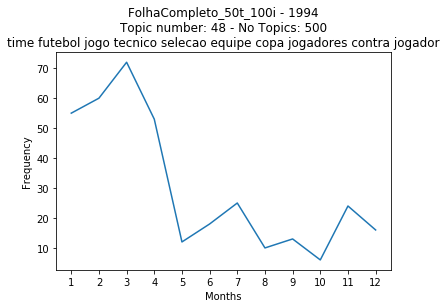

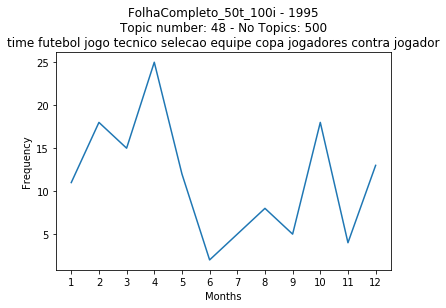

In [19]:
topic_number = 48
num = 500
d1, d2 = lista2dict(distriTemp(topic_number, num))
plot(d1, d2)

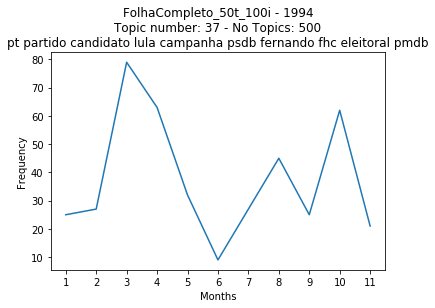

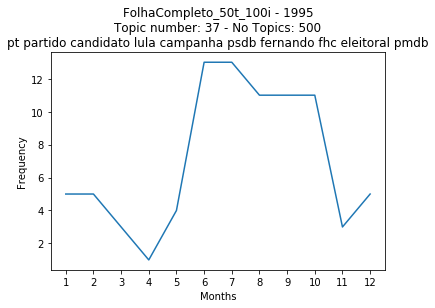

In [20]:
topic_number = 37
num = 500
d1, d2 = lista2dict(distriTemp(topic_number, num))
plot(d1, d2)